In [61]:
# Decision Trees

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df_icici=pd.read_csv("/content/drive/MyDrive/Python Colab Stuff Sem 3/Daily datasets for ML/ICICIBANK_day_data.csv")
print(df_icici)

      Unnamed: 0                       date   close    high     low    open  \
0              0  2015-01-01 00:00:00+05:30  320.27  321.32  318.36  320.64   
1              1  2015-01-02 00:00:00+05:30  329.36  330.45  320.00  320.00   
2              2  2015-01-05 00:00:00+05:30  330.05  334.00  328.64  332.09   
3              3  2015-01-06 00:00:00+05:30  316.05  327.18  314.73  326.73   
4              4  2015-01-07 00:00:00+05:30  307.50  314.77  304.95  314.18   
...          ...                        ...     ...     ...     ...     ...   
1902        1902  2022-10-17 00:00:00+05:30  885.20  887.50  868.55  872.00   
1903        1903  2022-10-18 00:00:00+05:30  896.90  900.70  891.15  896.05   
1904        1904  2022-10-19 00:00:00+05:30  892.10  900.65  885.55  900.05   
1905        1905  2022-10-20 00:00:00+05:30  888.65  893.30  880.10  889.70   
1906        1906  2022-10-21 00:00:00+05:30  907.15  910.00  885.70  888.00   

        volume  
0      2583281  
1      8272990  


In [65]:
df_icici.head()

,Unnamed: 0,date,close,high,low,open,volume
0,0,2015-01-01 00:00:00+05:30,320.27,321.32,318.36,320.64,2583281
1,1,2015-01-02 00:00:00+05:30,329.36,330.45,320.00,320.00,8272990
2,2,2015-01-05 00:00:00+05:30,330.05,334.00,328.64,332.09,10316090
3,3,2015-01-06 00:00:00+05:30,316.05,327.18,314.73,326.73,13282427
4,4,2015-01-07 00:00:00+05:30,307.50,314.77,304.95,314.18,21254332


In [66]:
df_icici.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1907 non-null   int64  
 1   date        1907 non-null   object 
 2   close       1907 non-null   float64
 3   high        1907 non-null   float64
 4   low         1907 non-null   float64
 5   open        1907 non-null   float64
 6   volume      1907 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 104.4+ KB


In [67]:
df_icici.shape

(1907, 7)

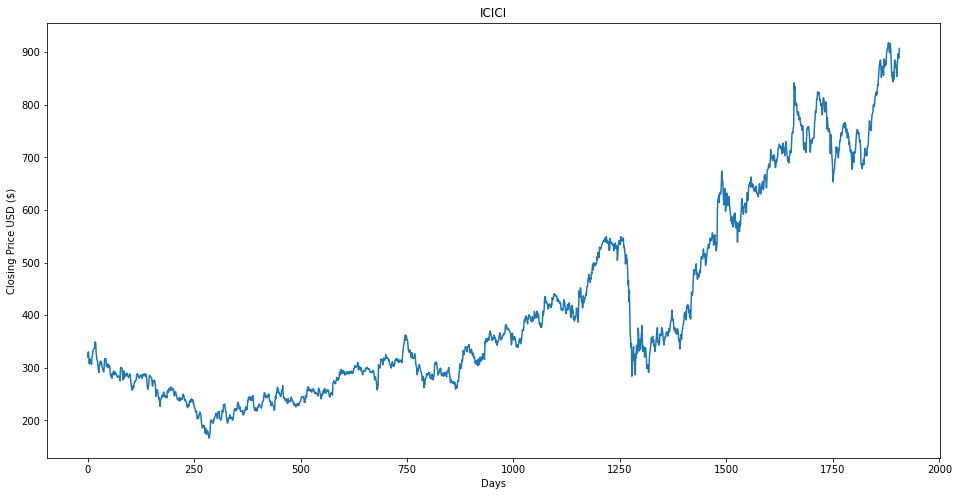

In [68]:
#Closing prices
plt.figure(figsize=(16,8))
plt.title('ICICI')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df_icici['close'])
plt.show()

In [77]:
#Close and prediction
df2_icici = df_icici['close']
df2_icici.head()
df2_icici = pd.DataFrame(df2_icici)  
df2_icici.head()
future_days = 90
df2_icici['Prediction'] = df2_icici['close'].shift(-future_days)
print(df2_icici.tail(100))
x = np.array(df2_icici.drop(['Prediction'], 1))[:-future_days]
print(x)
y = np.array(df2_icici['Prediction'])[:-future_days]
print(y)

       close  Prediction
1807  752.85      881.75
1808  752.65      870.60
1809  749.75      868.35
1810  744.30      853.60
1811  746.75      870.25
...      ...         ...
1902  885.20         NaN
1903  896.90         NaN
1904  892.10         NaN
1905  888.65         NaN
1906  907.15         NaN

[100 rows x 2 columns]
[[320.27]
 [329.36]
 [330.05]
 ...
 [732.75]
 [720.  ]
 [688.  ]]
[287.5  286.68 289.77 ... 892.1  888.65 907.15]


<ipython-input-77-e1c895f04d32>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df2_icici.drop(['Prediction'], 1))[:-future_days]


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
print(y_test.shape)

(455,)


In [71]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
tree_confidence = tree.score(x_train,y_train)
print("The Score is : ",tree_confidence)

The Score is :  0.9957005376326908


In [72]:
x_future = np.array(df2_icici.drop(['Prediction'], 1)) [-future_days:]
print(x_future)

[[685.5 ]
 [687.25]
 [678.5 ]
 [686.85]
 [685.95]
 [696.1 ]
 [686.6 ]
 [699.15]
 [713.45]
 [717.35]
 [710.3 ]
 [702.75]
 [707.2 ]
 [703.9 ]
 [720.1 ]
 [719.45]
 [725.95]
 [742.  ]
 [755.7 ]
 [769.5 ]
 [759.9 ]
 [753.2 ]
 [752.4 ]
 [751.2 ]
 [772.  ]
 [780.65]
 [783.1 ]
 [786.  ]
 [800.05]
 [800.9 ]
 [796.3 ]
 [800.5 ]
 [814.6 ]
 [818.6 ]
 [823.4 ]
 [817.75]
 [824.8 ]
 [820.25]
 [838.2 ]
 [836.95]
 [848.75]
 [859.7 ]
 [874.4 ]
 [879.25]
 [883.25]
 [885.1 ]
 [870.4 ]
 [852.25]
 [863.9 ]
 [873.3 ]
 [872.35]
 [870.85]
 [855.85]
 [887.3 ]
 [874.35]
 [872.4 ]
 [882.45]
 [883.65]
 [876.2 ]
 [898.8 ]
 [901.25]
 [907.2 ]
 [910.  ]
 [918.1 ]
 [917.6 ]
 [909.1 ]
 [899.2 ]
 [916.75]
 [915.25]
 [903.4 ]
 [882.25]
 [861.05]
 [852.55]
 [849.5 ]
 [843.9 ]
 [862.  ]
 [848.35]
 [867.65]
 [885.45]
 [882.55]
 [881.75]
 [870.6 ]
 [868.35]
 [853.6 ]
 [870.25]
 [885.2 ]
 [896.9 ]
 [892.1 ]
 [888.65]
 [907.15]]


<ipython-input-72-16ff6db68c40>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = np.array(df2_icici.drop(['Prediction'], 1)) [-future_days:]


In [73]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[755.    755.    786.    755.    755.    800.05  755.    788.05  748.9
 786.4   868.925 709.95  776.125 810.3   794.65  810.75  710.35  879.25
 855.85  718.3   746.6   755.55  872.4   736.25  718.3   718.2   720.
 697.35  696.15  696.15  732.75  696.15  687.25  752.85  752.65  752.85
 739.8   748.5   665.    665.    688.05  688.05  688.05  688.05  688.05
 688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05
 688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05
 688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05
 688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05
 688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05  688.05 ]


<ipython-input-74-20a3c2baaa11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


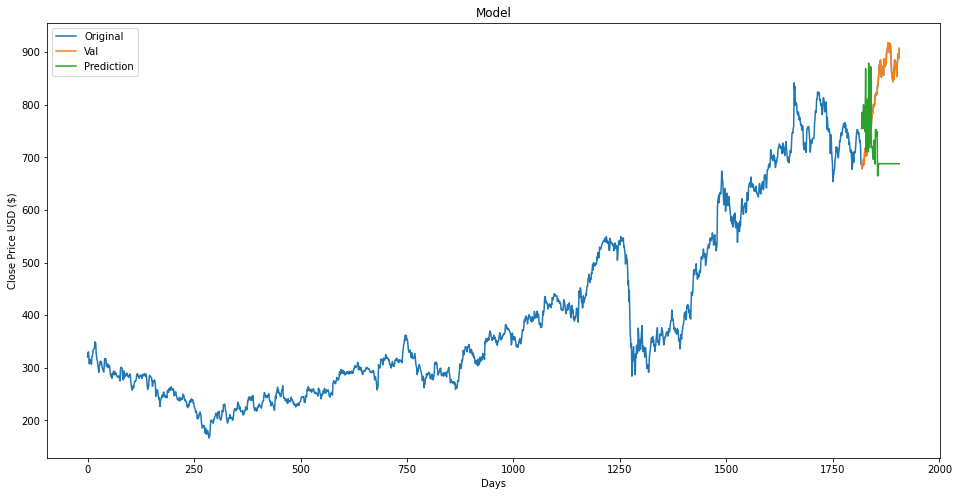

In [74]:
prediction = tree_prediction
valid = df2_icici[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_icici[ 'close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend (['Original', 'Val', 'Prediction'])
plt.show()

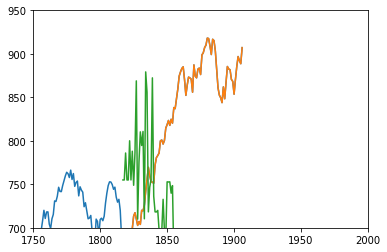

In [75]:
plt.plot(df_icici['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlim(1750, 2000)
plt.ylim(700, 950)
plt.show()